In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import talib
import warnings
warnings.filterwarnings("ignore")

In [2]:
T2306_df1 = pd.read_csv('/Users/tuxun/work/jnwork/建模大赛/HFtrading/data/future/T2306.CFE_20230228_20230306_new.csv')
T2306_df2 = pd.read_csv('/Users/tuxun/work/jnwork/建模大赛/HFtrading/data/future/T2306.CFE_20230323_20230331_new.csv')
T2306_df = T2306_df1.append(T2306_df2)
B220220_df = pd.read_csv('/Users/tuxun/work/jnwork/建模大赛/HFtrading/data/bond/220220_t1_cash_bond_ano_odm_cfets_xbond_orderbook_tick.csv')
B220025_df = pd.read_csv('/Users/tuxun/work/jnwork/建模大赛/HFtrading/data/bond/220025_t1_cash_bond_ano_odm_cfets_xbond_orderbook_tick.csv')

In [3]:

T2306_df = T2306_df.rename(columns={'Unnamed: 0':'datatime'})
T2306_df['datatime'] = T2306_df['datatime'].apply(lambda x: datetime.datetime.strptime(x, r'%Y-%m-%d %H:%M:%S.%f'))
T2306_df.index = pd.to_datetime(T2306_df['datatime'])
T2306_df['midprice'] = (T2306_df['ASK1'] + T2306_df['BID1']) / 2

In [4]:
B220220_df = B220220_df.rename(columns={'ts':'datatime'})
B220220_df['datatime'] = B220220_df['datatime'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
B220220_df.index = pd.to_datetime(B220220_df['datatime'])
B220220_df['midprice'] = (B220220_df['pask1'] + B220220_df['pbid1']) / 2
B220220_df['ymidprice'] = (B220220_df['yask1'] + B220220_df['ybid1']) / 2
B220220_df['yspread'] = B220220_df['ybid1'] - B220220_df['yask1']
B220220_df['pspread'] = B220220_df['pask1'] - B220220_df['pbid1']
B220220_df = B220220_df[~B220220_df.index.duplicated()]

In [5]:
B220025_df = B220025_df.rename(columns={'ts':'datatime'})
B220025_df['datatime'] = B220025_df['datatime'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
B220025_df.index = pd.to_datetime(B220025_df['datatime'])
B220025_df['midprice'] = (B220025_df['pask1'] + B220025_df['pbid1']) / 2


In [33]:
date_str = '2023-03-23'
start_time = date_str + ' 13:30:00'
end_time = date_str + ' 14:00:00'
t0301 = T2306_df.loc[date_str]
b0301 = B220220_df.loc[date_str]
b10301 = B220025_df.loc[date_str]
t0301 = t0301.loc[start_time:end_time]
b0301 = b0301.loc[start_time:end_time]
b10301 = b10301.loc[start_time:end_time]

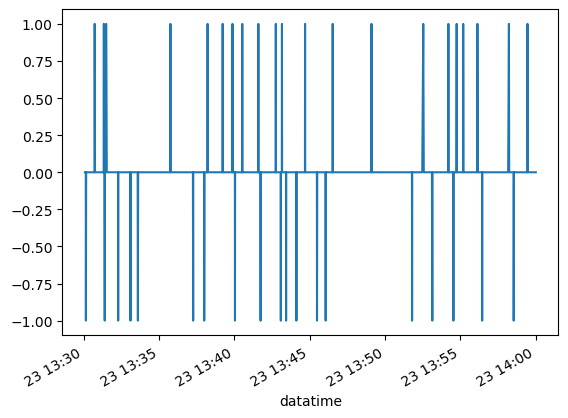

In [34]:
def buy_signal(x):
    before = x[-10:-5]
    after = x[-5:]
    b = min(after) - max(before)
    s = min(before) - max(after)
    if b >= 0.0049:
        return 1
    elif s >= 0.0049:
        return -1
    else:  
        return 0

t0301['midprice'].rolling(10).apply(buy_signal).plot()
t0301['buy_sig'] = t0301['midprice'].rolling(10).apply(buy_signal)

In [25]:
t0301['midprice']

datatime
2023-03-23 09:30:00.000    100.4325
2023-03-23 09:30:00.500    100.4350
2023-03-23 09:30:01.000    100.4325
2023-03-23 09:30:01.500    100.4375
2023-03-23 09:30:02.000    100.4375
                             ...   
2023-03-23 09:59:53.000    100.4375
2023-03-23 09:59:53.500    100.4375
2023-03-23 09:59:54.000    100.4375
2023-03-23 09:59:55.000    100.4375
2023-03-23 09:59:58.000    100.4375
Name: midprice, Length: 1910, dtype: float64

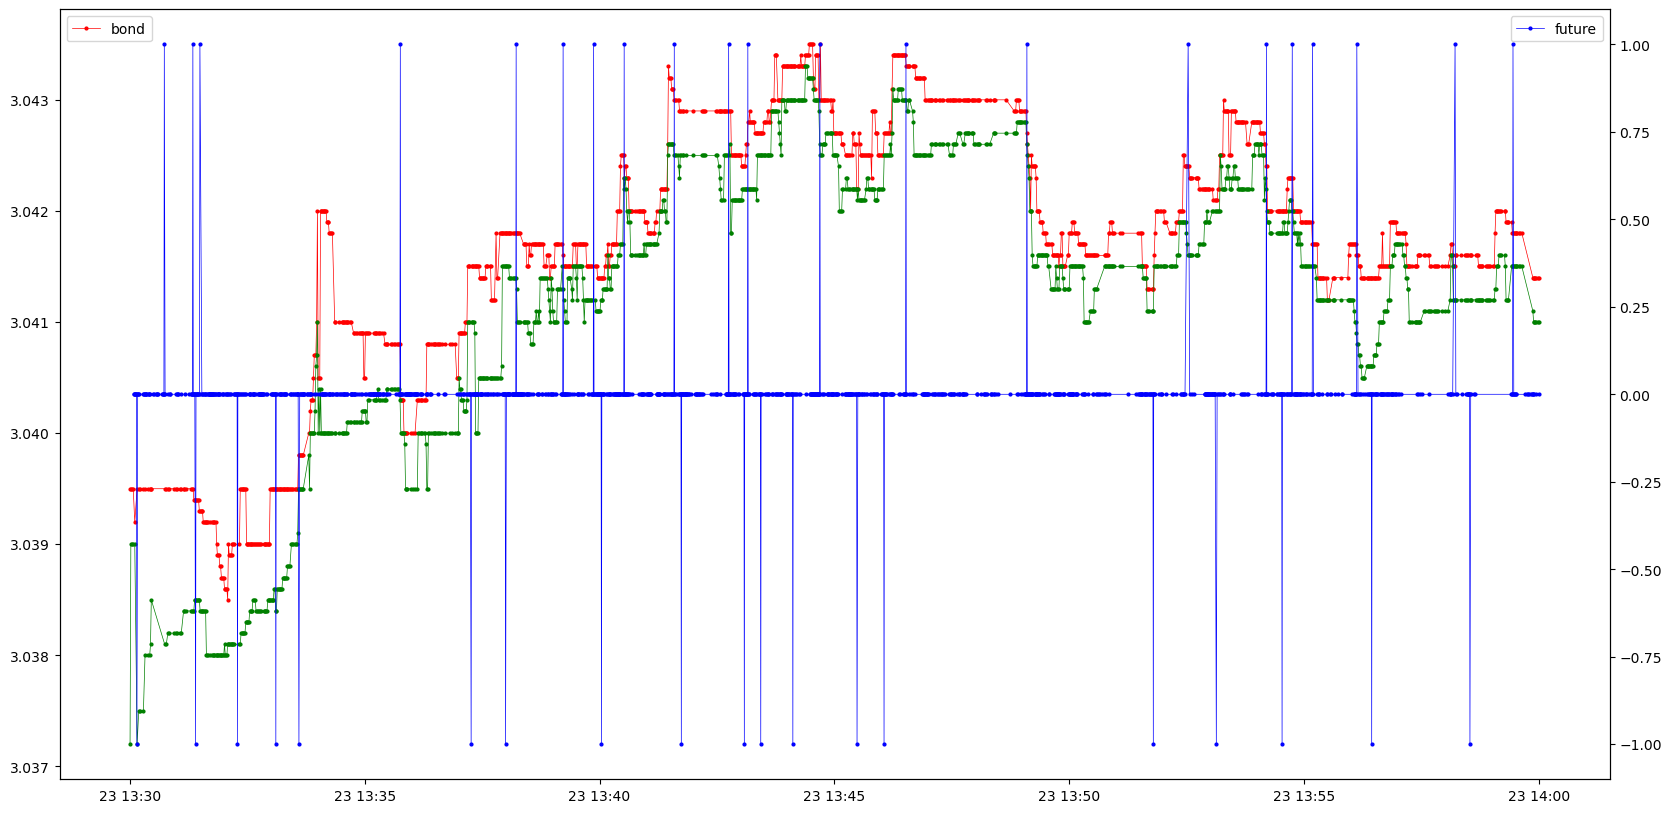

In [40]:
#让两个图用同一个y轴
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(b0301['ybid1'], 'r-', marker='o', markersize=2, linewidth=0.5)
ax1.plot(b0301['yask1'], 'g-', marker='o', markersize=2, linewidth=0.5)
ax2.plot(t0301['buy_sig'], 'b-', marker='o', markersize=2, linewidth=0.5)


#加上图例
ax1.legend(['bond'], loc=2)
ax2.legend(['future'], loc=1)
#ax3.legend(['ymidprice'], loc=0)

plt.show()


<AxesSubplot:>

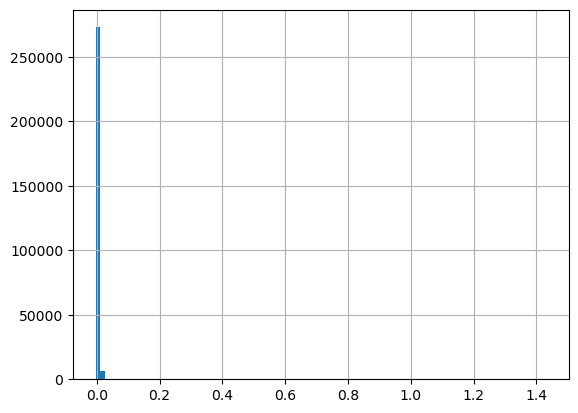

In [71]:


B220220_df['pspread'].hist(bins=100)

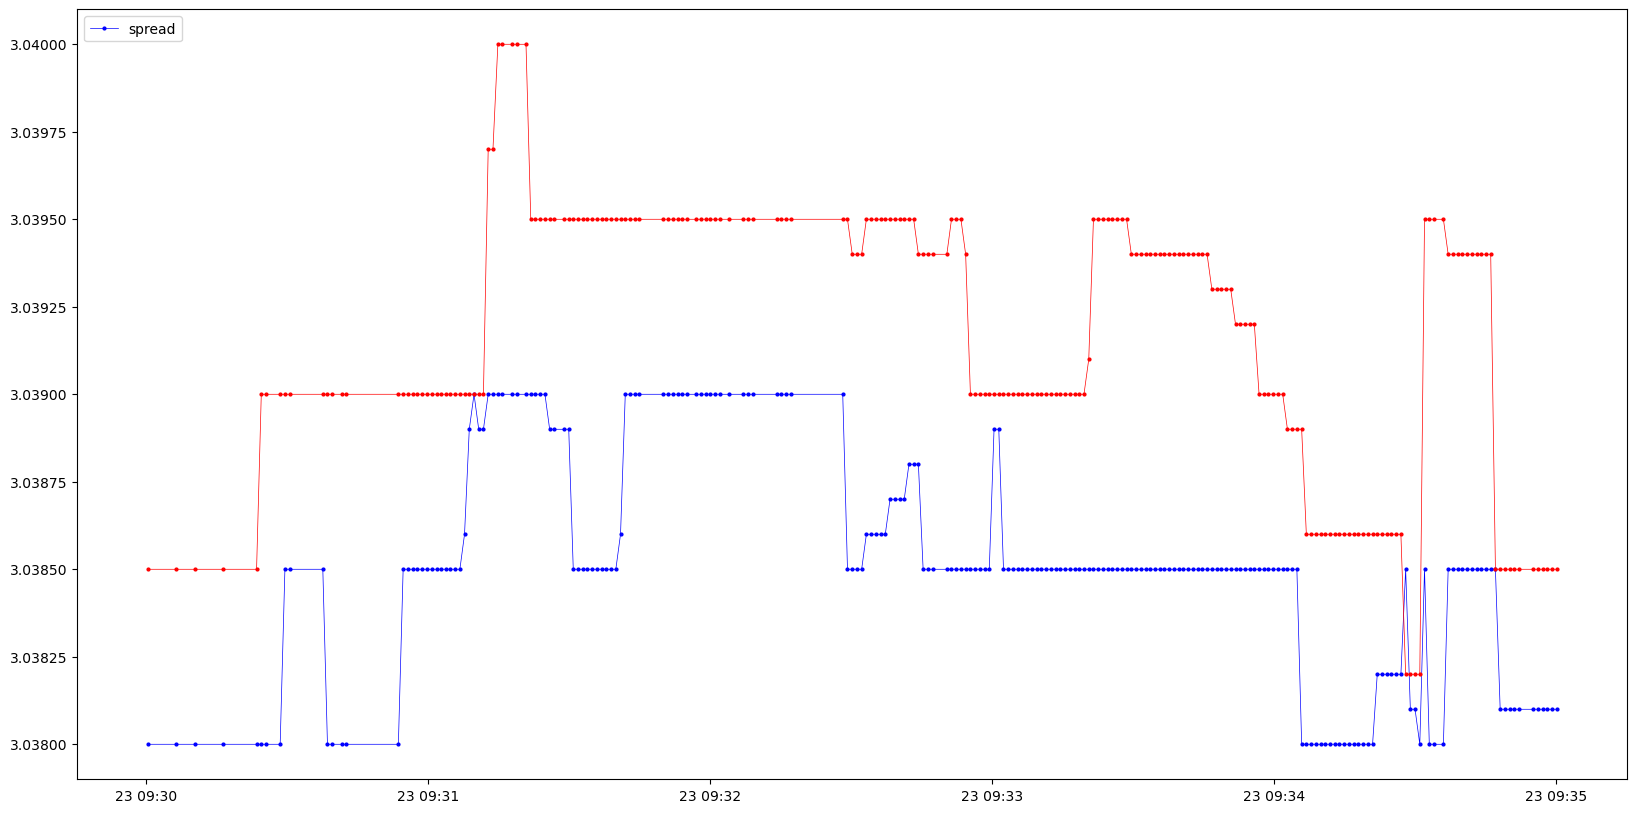

In [12]:

fig = plt.subplots(figsize=(20, 10))

plt.plot(b0301['yask1'], 'b-', marker='o', markersize=2, linewidth=0.5)
plt.plot(b0301['ybid1'], 'r-', marker='o', markersize=2, linewidth=0.5)

#加上图例
plt.legend(['spread'], loc=2)


plt.show()

In [66]:
T2306_df.resample('1min', on='datatime').last()

,datatime,LAST,BID1,ASK1,VOLUME,midprice,rsi6,rsi14,ma10
datatime,,,,,,,,,
2023-02-28 07:03:00,2023-02-28 07:03:39,99.735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 07:04:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 07:05:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 07:06:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 07:07:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-03-06 15:22:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-06 15:23:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-06 15:24:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


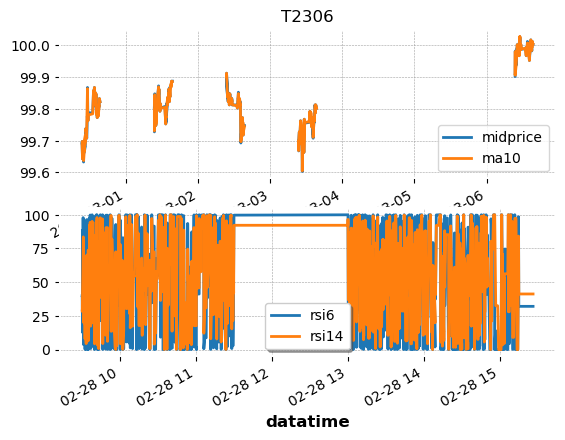

In [67]:
fig,axes = plt.subplots(2,1)
T2306_df[['midprice', 'ma10']].plot(ax=axes[0], grid=True, title='T2306')
# 画 RSI 曲线图
T2306_df[['rsi6', 'rsi14']].plot(ax=axes[1], grid=True)
plt.legend(loc='best', shadow=True)
plt.show()

In [68]:
dd = T2306_df['midprice'].resample('1min').ohlc().dropna()

In [69]:
dd0301 = dd.loc['2023-03-01']

In [70]:
dd0301['alpha'] = (dd0301['close'] - dd0301['low']) / (dd0301['high'] - dd0301['low'])

In [71]:
print(dd0301)

                        open     high      low    close     alpha
datatime                                                         
2023-03-01 09:29:00  99.8025  99.8025  99.8025  99.8025       NaN
2023-03-01 09:30:00  99.8075  99.8075  99.7375  99.7375  0.000000
2023-03-01 09:31:00  99.7350  99.7725  99.7275  99.7700  0.944444
2023-03-01 09:32:00  99.7725  99.7875  99.7675  99.7825  0.750000
2023-03-01 09:33:00  99.7825  99.7825  99.7625  99.7675  0.250000
...                      ...      ...      ...      ...       ...
2023-03-01 15:12:00  99.8825  99.8875  99.8825  99.8825  0.000000
2023-03-01 15:13:00  99.8825  99.8875  99.8825  99.8875  1.000000
2023-03-01 15:14:00  99.8875  99.8875  99.8825  99.8875  1.000000
2023-03-01 15:15:00  99.8875  99.8875  99.8875  99.8875       NaN
2023-03-01 15:29:00  99.8875  99.8875  99.8875  99.8875       NaN

[258 rows x 5 columns]


In [331]:
bb = B220025_df['midprice'].resample('1min').ohlc().dropna()
bb0301 = bb.loc['2023-03-01']

,open,high,low,close,alpha,volume
datatime,,,,,,
2023-03-01 09:29:00,99.8025,99.8025,99.8025,99.8025,NaN,NaN
2023-03-01 09:30:00,99.8075,99.8075,99.7375,99.7375,0.000000,0.000000
2023-03-01 09:31:00,99.7350,99.7725,99.7275,99.7700,0.944444,0.944444
2023-03-01 09:32:00,99.7725,99.7875,99.7675,99.7825,0.750000,0.750000
2023-03-01 09:33:00,99.7825,99.7825,99.7625,99.7675,0.250000,0.250000
...,...,...,...,...,...,...
2023-03-01 15:12:00,99.8825,99.8875,99.8825,99.8825,0.000000,0.000000
2023-03-01 15:13:00,99.8825,99.8875,99.8825,99.8875,1.000000,1.000000
2023-03-01 15:14:00,99.8875,99.8875,99.8825,99.8875,1.000000,1.000000


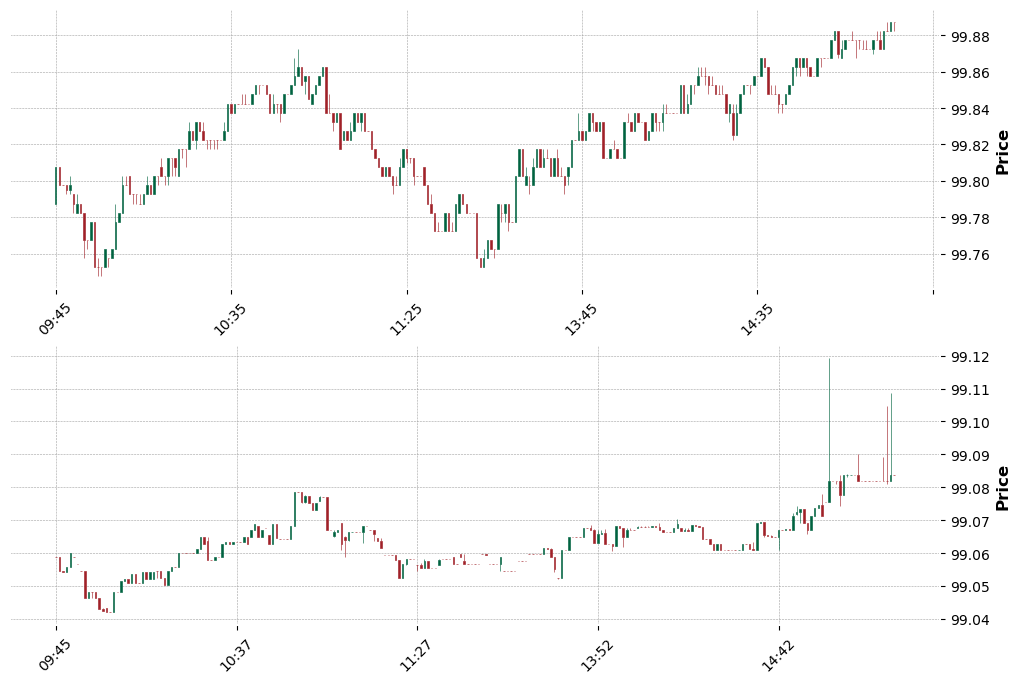

In [351]:
import mplfinance as mpl
import matplotlib.pyplot as plt

start_time = '2023-03-01 09:45:00'
end_time = '2023-03-01 15:14:00'

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

dd0301 = dd0301.loc[start_time:end_time]
bb0301 = bb0301.loc[start_time:end_time]

mpl.plot(dd0301, type='candle', style='charles', ax=axs[0])
mpl.plot(bb0301, type='candle', style='charles', ax=axs[1])

mpl.show()

In [100]:
T2306_df['alpha'] = T2306_df['midprice'].rolling(120).apply(lambda x: (x[-1] - x.min()) / (x.max() - x.min()))

In [109]:
T2306_df['delta_price'] = T2306_df['midprice'].rolling(20).apply(lambda x: x.max() - x.min())

In [136]:
#T2306_df['midprice'].loc['2023-03-01'].plot()
T2306_df['rsi14'].loc['2023-03-01'].to_list()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [143]:
t0301 = T2306_df.loc['2023-03-01']

In [144]:
t0301['midprice'] = (t0301['ASK1'] + t0301['BID1']) / 2

/var/folders/fm/9njy0pdx0bl6x1tf4xqqwsg80000gn/T/ipykernel_99177/2616201939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t0301['midprice'] = (t0301['ASK1'] + t0301['BID1']) / 2


/var/folders/fm/9njy0pdx0bl6x1tf4xqqwsg80000gn/T/ipykernel_99177/3182124431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t0301['rsi20'] =  talib.RSI(t0301['midprice'], timeperiod = 80)


<AxesSubplot:>

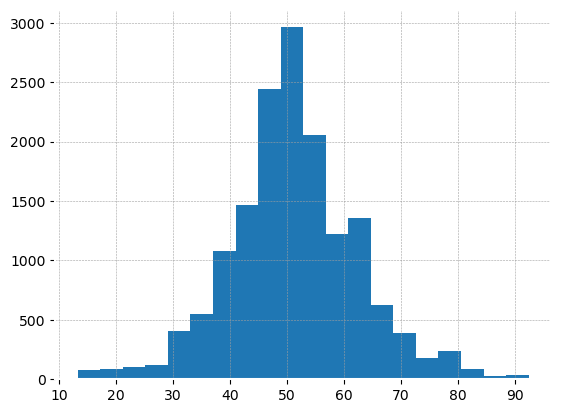

In [161]:
t0301['rsi20']=  talib.RSI(t0301['midprice'], timeperiod = 40)
t0301['rsi20'].hist(bins=20)

In [174]:
t0301[t0301['rsi20'] > 70]

,datatime,LAST,BID1,ASK1,VOLUME,midprice,rsi6,rsi20
datatime,,,,,,,,
2023-03-01 09:35:17,2023-03-01 09:35:17,99.805,99.805,99.81,6478.0,99.8075,98.612384,72.022006
2023-03-01 09:35:17,2023-03-01 09:35:17,99.805,99.805,99.81,6484.0,99.8075,98.612384,72.022006
2023-03-01 09:35:18,2023-03-01 09:35:18,99.805,99.805,99.81,6486.0,99.8075,98.612384,72.022006
2023-03-01 09:35:18,2023-03-01 09:35:18,99.805,99.805,99.81,6486.0,99.8075,98.612384,72.022006
2023-03-01 09:35:19,2023-03-01 09:35:19,99.805,99.805,99.81,6486.0,99.8075,98.612384,72.022006
...,...,...,...,...,...,...,...,...
2023-03-01 15:13:58,2023-03-01 15:13:58,99.890,99.885,99.89,66367.0,99.8875,100.000000,78.171624
2023-03-01 15:14:00,2023-03-01 15:14:00,99.890,99.885,99.89,66367.0,99.8875,100.000000,78.171624
2023-03-01 15:14:00,2023-03-01 15:14:00,99.890,99.885,99.89,66367.0,99.8875,100.000000,78.171624


In [328]:

B220025_df = B220025_df.rename(columns={'ts':'datatime'})


B220025_df['datatime'] = B220025_df['datatime'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))

B220025_df.index = pd.to_datetime(B220025_df['datatime'])

In [329]:
B220025_df['midprice'] = (B220025_df['pask1'] + B220025_df['pbid1']) / 2

In [195]:
B220025_df = B220025_df[~B220025_df.index.duplicated()]
B220025_df_buy_points = B220025_df.iloc[B220025_df.index.get_indexer(t0301[t0301['rsi20'] > 70].index.to_list(), method='nearest')]
B220025_df_buy_points_120s = B220025_df.iloc[B220025_df.index.get_indexer(t0301[t0301['rsi20'] > 70].index + pd.Timedelta(seconds=120), method='nearest')]


In [314]:
T2306.groupby('day').count()

,ts,symbol,month,pask1,pask2,pask3,pask4,pask5,pask6,pask7,...,ybid2,ybid3,ybid4,ybid5,ybid6,ybid7,ybid8,ybid9,ybid10,year
day,,,,,,,,,,,,,,,,,,,,,
2023-02-28,12319,12319,12319,12319,12317,12313,12298,12271,0,0,...,12315,12312,12308,12300,0,0,0,0,0,12319
2023-03-01,11601,11601,11601,11601,11600,11597,11592,11591,0,0,...,11593,11579,11578,11550,0,0,0,0,0,11601
2023-03-02,11395,11395,11395,11394,11392,11390,11353,11348,0,0,...,11375,11337,11276,11228,0,0,0,0,0,11395
2023-03-03,13072,13072,13072,13072,13070,13051,13026,13004,0,0,...,13059,13056,13051,13023,0,0,0,0,0,13072
2023-03-06,11837,11837,11837,11837,11836,11830,11821,11806,0,0,...,11831,11822,11801,11767,0,0,0,0,0,11837
2023-03-07,12593,12593,12593,12592,12591,12588,12582,12578,0,0,...,12589,12586,12554,12541,0,0,0,0,0,12593
2023-03-08,12894,12894,12894,12894,12893,12890,12885,12875,0,0,...,12873,12861,12844,12806,0,0,0,0,0,12894
2023-03-09,13503,13503,13503,13500,13487,13470,13439,13390,0,0,...,13502,13494,13477,13469,0,0,0,0,0,13503
2023-03-10,12243,12243,12243,12241,12233,12191,12166,12146,0,0,...,12239,12221,12198,12169,0,0,0,0,0,12243


In [315]:
T_alldays = None
n = 0
for oneday in T2306_df['datatime'].apply(lambda x: x.date()).unique():
    t_oneday = T2306_df.loc[oneday.strftime('%Y-%m-%d')]
    t_oneday['rsi']=  talib.RSI(t_oneday['midprice'], timeperiod = 40)
    if n == 0:
        T_alldays = t_oneday
        n = 1
    else:
        T_alldays = T_alldays.append(t_oneday)

/var/folders/fm/9njy0pdx0bl6x1tf4xqqwsg80000gn/T/ipykernel_99177/3674295525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_oneday['rsi']=  talib.RSI(t_oneday['midprice'], timeperiod = 40)
/var/folders/fm/9njy0pdx0bl6x1tf4xqqwsg80000gn/T/ipykernel_99177/3674295525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_oneday['rsi']=  talib.RSI(t_oneday['midprice'], timeperiod = 40)
/var/folders/fm/9njy0pdx0bl6x1tf4xqqwsg80000gn/T/ipykernel_99177/3674295525.py:10: FutureWarning: The frame.append method 

In [324]:
#T_alldays按日期分组统计数据量
T2306_df

,datatime,LAST,BID1,ASK1,VOLUME
datatime,,,,,
2023-02-28 07:03:39,2023-02-28 07:03:39,99.735,NaN,NaN,NaN
2023-02-28 09:29:00,2023-02-28 09:29:00,99.695,99.690,99.695,72.0
2023-02-28 09:30:00,2023-02-28 09:30:00,99.695,99.690,99.695,124.0
2023-02-28 09:30:00,2023-02-28 09:30:00,99.690,99.685,99.690,149.0
2023-02-28 09:30:01,2023-02-28 09:30:01,99.680,99.680,99.690,175.0
...,...,...,...,...,...
2023-03-06 15:14:58,2023-03-06 15:14:58,100.000,100.000,100.005,58690.0
2023-03-06 15:14:59,2023-03-06 15:14:59,100.000,100.000,100.005,58692.0
2023-03-06 15:14:59,2023-03-06 15:14:59,100.000,100.000,100.005,58694.0


In [231]:
price_delta = B220025_df_buy_points_120s['midprice'].reset_index() - B220025_df_buy_points['midprice'].reset_index()
price_delta = price_delta['midprice']


In [254]:
# q_low = price_delta.quantile(0.1)
# q_high = price_delta.quantile(0.9)
# df_filtered = price_delta[(price_delta >= q_low) & (price_delta <= q_high)]
# print(df_filtered.describe())
# df_filtered.hist(bins=100)
df_mean = df_filtered.mean()
win_rate = df_filtered[df_filtered > 0].count() / df_filtered.count()
print(df_mean, win_rate)

0.0017611028315959998 0.5201192250372578


In [260]:
T_alldays = None
n = 0
for oneday in T2306_df['datatime'].apply(lambda x: x.date()).unique():
    print(oneday)
    t_oneday = T2306_df.loc[oneday]
    t_oneday['rsi40']=  talib.RSI(t_oneday['midprice'], timeperiod = 40)
    if n == 0:
        T_alldays = t_oneday
        n = 1
    else:
        T_alldays = T_alldays.append(t_oneday)


2023-02-28


KeyError: datetime.date(2023, 2, 28)

In [265]:
T2306_df['midprice'] = (T2306_df['ASK1'] + T2306_df['BID1']) / 2
T_alldays = None
n = 0
for oneday in T2306_df['datatime'].apply(lambda x: x.date()).unique():
    t_oneday = T2306_df.loc[oneday.strftime('%Y-%m-%d')]
    t_oneday['rsi40']=  talib.RSI(t_oneday['midprice'], timeperiod = 40)
    if n == 0:
        T_alldays = t_oneday
        n = 1
    else:
        T_alldays = T_alldays.append(t_oneday)



/var/folders/fm/9njy0pdx0bl6x1tf4xqqwsg80000gn/T/ipykernel_99177/3856486456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_oneday['rsi40']=  talib.RSI(t_oneday['midprice'], timeperiod = 40)
/var/folders/fm/9njy0pdx0bl6x1tf4xqqwsg80000gn/T/ipykernel_99177/3856486456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_oneday['rsi40']=  talib.RSI(t_oneday['midprice'], timeperiod = 40)
/var/folders/fm/9njy0pdx0bl6x1tf4xqqwsg80000gn/T/ipykernel_99177/3856486456.py:11: FutureWarning: The frame.append met

In [270]:
time_diff = T_alldays.index.to_series().diff().dt.total_seconds()
T_alldays_filter = T_alldays[time_diff >= 120]

In [285]:
# Initialize variables
selected_index = []
prev_index = None

# Iterate through DataFrame
for index, row in T_alldays.iterrows():
    # If this is the first row, add it to the selected rows
    if prev_index is None:
        selected_index.append(index)
        prev_index = index
    else:
        # Calculate time difference between this row and the previous row
        time_diff = (index - prev_index).total_seconds()

        # If time difference is at least 120 seconds, add this row to the selected rows
        if time_diff >= 120:
            selected_index.append(index)
            # Set this row as the previous row for the next iteration
            prev_index = index
        else:
            # Skip this row and move on to the next row
            continue

In [295]:
T_filter = T_alldays.loc[selected_index]

In [298]:
T_filter

,datatime,LAST,BID1,ASK1,VOLUME,midprice,rsi40
datatime,,,,,,,
2023-02-28 07:03:39,2023-02-28 07:03:39,99.735,NaN,NaN,NaN,NaN,NaN
2023-02-28 09:29:00,2023-02-28 09:29:00,99.695,99.690,99.695,72.0,99.6925,NaN
2023-02-28 09:31:00,2023-02-28 09:31:00,99.695,99.695,99.700,1006.0,99.6975,62.267215
2023-02-28 09:31:00,2023-02-28 09:31:00,99.695,99.690,99.695,1020.0,99.6925,52.609965
2023-02-28 09:33:01,2023-02-28 09:33:01,99.670,99.670,99.675,2201.0,99.6725,42.958515
...,...,...,...,...,...,...,...
2023-03-06 15:11:00,2023-03-06 15:11:00,100.005,100.000,100.005,56894.0,100.0025,31.614797
2023-03-06 15:13:00,2023-03-06 15:13:00,100.005,100.005,100.010,57755.0,100.0075,46.367942
2023-03-06 15:13:00,2023-03-06 15:13:00,100.005,100.005,100.010,57756.0,100.0075,46.367942


In [303]:
B220025_df.index.get_indexer(T_filter[T_filter['rsi40'] > 70].index.to_list(), method='nearest')

array([11312, 11400, 11677, 11677, 11775, 11794, 12046, 12046, 12310,
       12310, 12373, 12428, 12428, 12431, 12431, 12432, 12432, 12647,
       12647, 12728, 12988, 12988, 13044, 13072, 13072, 13783, 13887,
       13887, 14082, 14082, 14113, 14113, 14133, 14323, 14375, 14375,
       14750, 15133, 15133, 15136, 15136, 15237, 15237, 15422, 15422,
       15513, 15513, 15640, 15640, 15730, 15730, 16585, 17019, 17053,
       17053, 17170, 17343, 19141, 19285, 19767, 20006, 20006, 20211,
       20211, 20267, 20316, 20346, 20530, 20743, 21975, 22110, 22110,
       22443, 22879, 22879, 24511, 24511, 25031, 25781, 26155, 26457,
       26529, 27158, 27385, 27385, 27594, 27778, 27778, 28846, 29013,
       29260, 29260, 30165, 30165, 30296, 30337, 30509, 30509, 31815,
       32030, 32081, 32452, 32564, 32574, 32671, 32671, 32671, 32685,
       33768, 33768, 33783, 33783, 33995, 34134, 34134, 34938, 35020])

In [305]:
T_filter[T_filter['rsi40'] > 90]

,datatime,LAST,BID1,ASK1,VOLUME,midprice,rsi40
datatime,,,,,,,
2023-02-28 15:06:37,2023-02-28 15:06:37,99.820,99.815,99.820,70518.0,99.8175,94.944609
2023-03-01 10:53:10,2023-03-01 10:53:10,99.860,99.855,99.860,28340.0,99.8575,97.419377
2023-03-01 10:53:10,2023-03-01 10:53:10,99.860,99.855,99.860,28340.0,99.8575,97.419377
2023-03-01 13:44:03,2023-03-01 13:44:03,99.825,99.825,99.830,46663.0,99.8275,96.076446
2023-03-01 13:44:03,2023-03-01 13:44:03,99.825,99.825,99.830,46664.0,99.8275,96.076446
2023-03-01 14:56:14,2023-03-01 14:56:14,99.875,99.870,99.875,61432.0,99.8725,97.214076
2023-03-01 14:56:14,2023-03-01 14:56:14,99.875,99.870,99.875,61434.0,99.8725,97.214076
2023-03-01 15:02:15,2023-03-01 15:02:15,99.880,99.880,99.885,63190.0,99.8825,96.269377
2023-03-01 15:12:16,2023-03-01 15:12:16,99.890,99.885,99.890,65678.0,99.8875,92.689557


In [15]:
#计算B220220_df的pask1~pask10,pbid1~pbid10的非nan率
for i in range(1,11):
    print('pask'+str(i)+'_notnull_rate:',B220220_df['pask'+str(i)].isna().sum()/B220220_df['pask'+str(i)].count(), 'pbid'+str(i)+'_notnull_rate:',B220220_df['pbid'+str(i)].isna().sum()/B220220_df['pbid'+str(i)].count())

pask1_notnull_rate: 9.996679674251052e-05 pbid1_notnull_rate: 0.00017138388920031564
pask2_notnull_rate: 0.0004535811481674607 pbid2_notnull_rate: 0.0004893136750671467
pask3_notnull_rate: 0.0012116576477400262 pbid3_notnull_rate: 0.0010971573974139965
pask4_notnull_rate: 0.002422667869054265 pbid4_notnull_rate: 0.0024585411939849837
pask5_notnull_rate: 0.0036869562724836254 pbid5_notnull_rate: 0.0044787572793252815
pask6_notnull_rate: inf pbid6_notnull_rate: inf
pask7_notnull_rate: inf pbid7_notnull_rate: inf
pask8_notnull_rate: inf pbid8_notnull_rate: inf
pask9_notnull_rate: inf pbid9_notnull_rate: inf
pask10_notnull_rate: inf pbid10_notnull_rate: inf


/var/folders/fm/9njy0pdx0bl6x1tf4xqqwsg80000gn/T/ipykernel_34138/3174717495.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  print('pask'+str(i)+'_notnull_rate:',B220220_df['pask'+str(i)].isna().sum()/B220220_df['pask'+str(i)].count(), 'pbid'+str(i)+'_notnull_rate:',B220220_df['pbid'+str(i)].isna().sum()/B220220_df['pbid'+str(i)].count())


<AxesSubplot:>

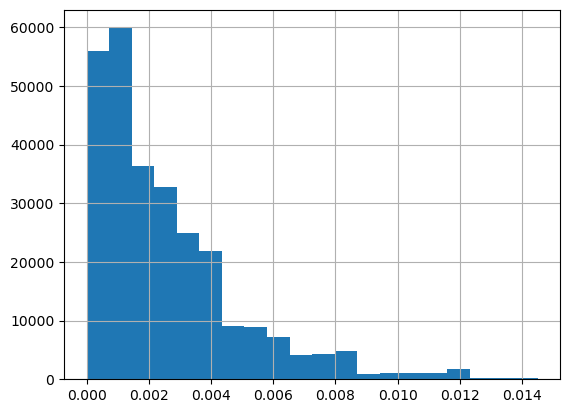

In [7]:
#选取pask1-pbid1,然后求出分布
B220220_df['delta'] = (B220220_df['pask1'] - B220220_df['pbid1'])
#去掉极值
q_low = B220220_df['delta'].quantile(0.01)
q_high = B220220_df['delta'].quantile(0.99)
df_filtered = B220220_df[(B220220_df['delta'] >= q_low) & (B220220_df['delta'] <= q_high)]
df_filtered['delta'].hist(bins=20) 

In [11]:
def filter_index(df, time_diff):
    selected_index = []
    prev_index = None

    for index, row in df.iterrows():
        if prev_index is None:
            selected_index.append(index)
            prev_index = index
        else:
            diff = (index - prev_index).total_seconds()
            if diff >= time_diff:
                selected_index.append(index)
                prev_index = index
            else:
                continue
    return df.loc[selected_index]


In [13]:
df_10 = filter_index(df_filtered, 10)

In [31]:
df_filtered[df_filtered['yspread'] == 0]

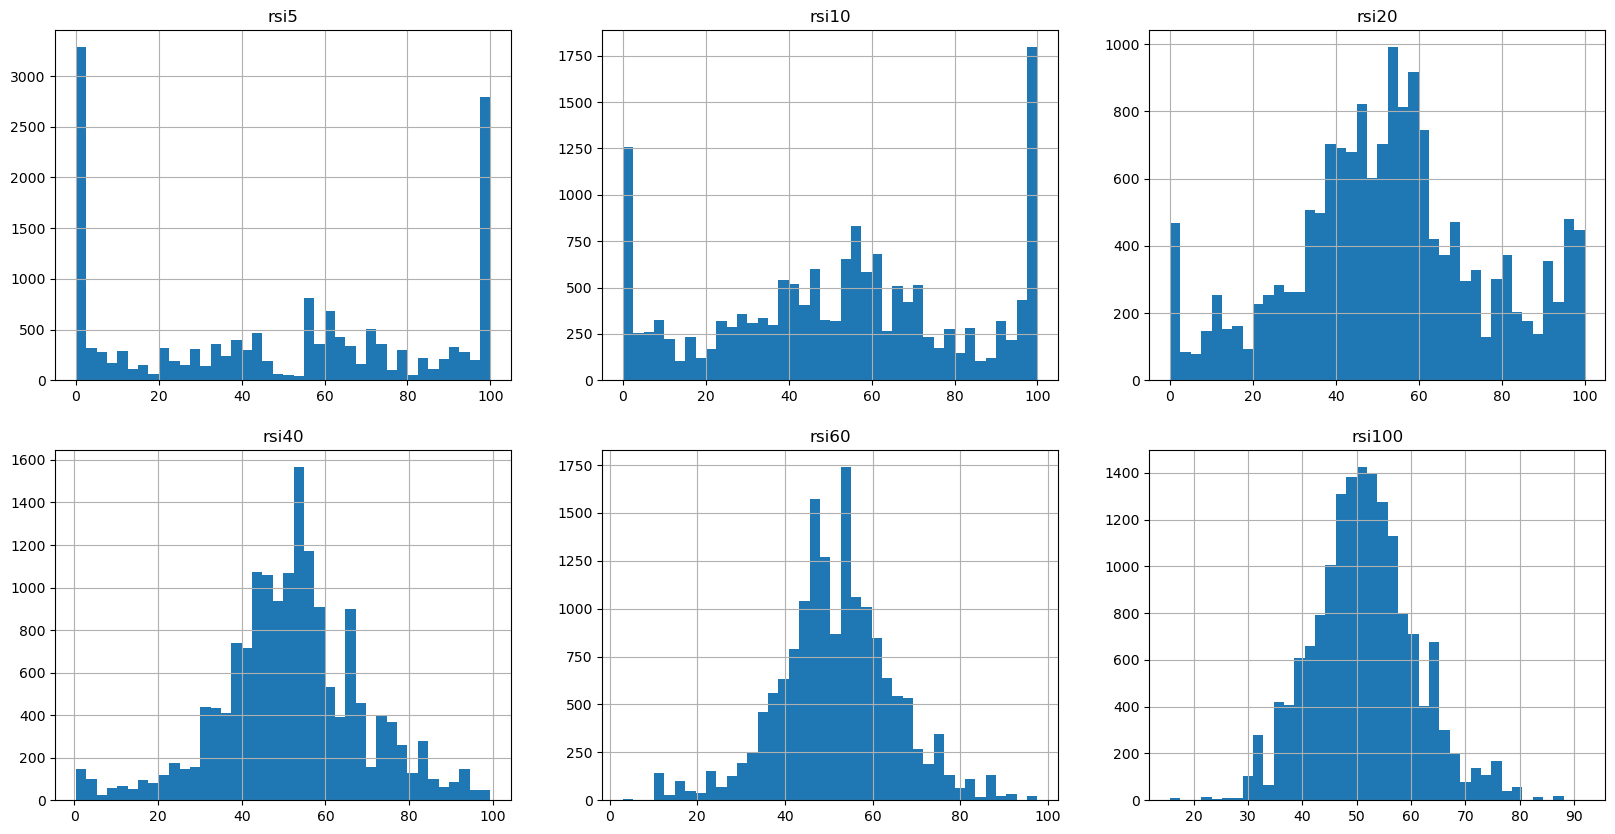

In [17]:
#计算T2306_df的RSI,取不同的timeperiod,计算不同的RSI
T2306_df['rsi5'] = talib.RSI(T2306_df['midprice'], timeperiod = 5)
T2306_df['rsi10'] = talib.RSI(T2306_df['midprice'], timeperiod = 10)
T2306_df['rsi20'] = talib.RSI(T2306_df['midprice'], timeperiod = 20)
T2306_df['rsi40'] = talib.RSI(T2306_df['midprice'], timeperiod = 40)
T2306_df['rsi60'] = talib.RSI(T2306_df['midprice'], timeperiod = 60)
T2306_df['rsi100'] = talib.RSI(T2306_df['midprice'], timeperiod = 100)
#画出分布图，画在一张画布上，bins取40，需要给每个图添加描述，以及图例
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
T2306_df['rsi5'].hist(bins=40, ax=ax[0, 0])
ax[0, 0].set_title('rsi5')
T2306_df['rsi10'].hist(bins=40, ax=ax[0, 1])
ax[0, 1].set_title('rsi10')
T2306_df['rsi20'].hist(bins=40, ax=ax[0, 2])
ax[0, 2].set_title('rsi20')
T2306_df['rsi40'].hist(bins=40, ax=ax[1, 0])
ax[1, 0].set_title('rsi40')
T2306_df['rsi60'].hist(bins=40, ax=ax[1, 1])
ax[1, 1].set_title('rsi60')
T2306_df['rsi100'].hist(bins=40, ax=ax[1, 2])
ax[1, 2].set_title('rsi100')
plt.show()





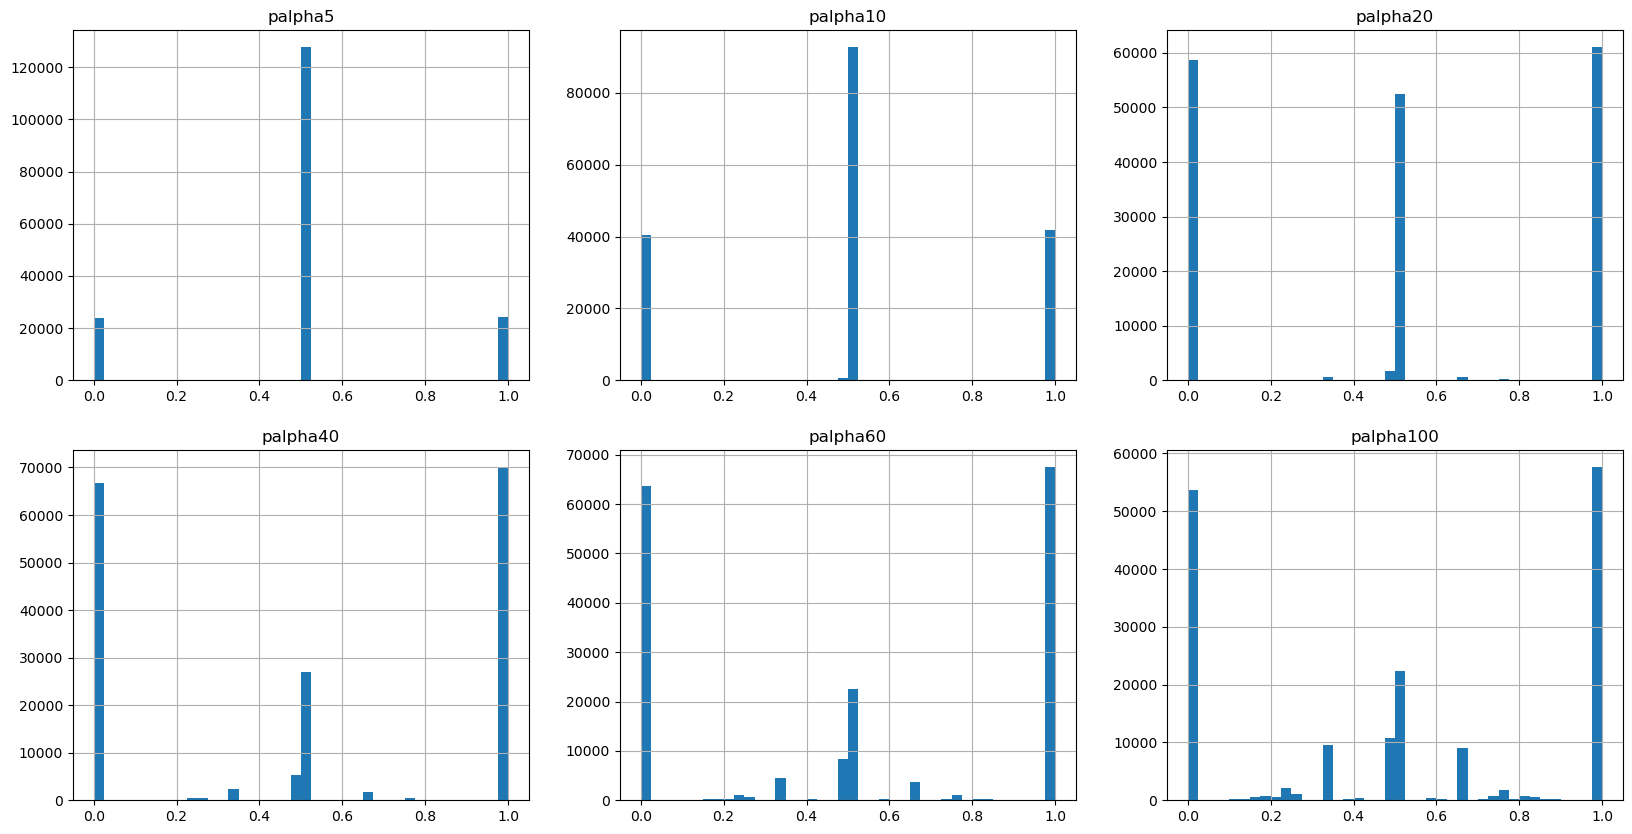

In [18]:
#定义palpha = (close - low) / (high - low), 滚动计算palpha
def calpalpha(plist):
    low = min(plist)
    high = max(plist)
    close = plist[-1]
    if high > low:
        return (close - low) / (high - low)
    else:
        return 0.5

#rolling计算
T2306_df['palpha5']  = T2306_df['midprice'].rolling(5).apply(calpalpha)
T2306_df['palpha10']  = T2306_df['midprice'].rolling(10).apply(calpalpha)
T2306_df['palpha20']  = T2306_df['midprice'].rolling(20).apply(calpalpha)
T2306_df['palpha40']  = T2306_df['midprice'].rolling(40).apply(calpalpha)
T2306_df['palpha60']  = T2306_df['midprice'].rolling(60).apply(calpalpha)
T2306_df['palpha100']  = T2306_df['midprice'].rolling(100).apply(calpalpha)

#画出分布图，画在一张画布上，bins取40，需要给每个图添加描述，以及图例
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
T2306_df['palpha5'].hist(bins=20, ax=ax[0, 0])
ax[0, 0].set_title('palpha5')
T2306_df['palpha10'].hist(bins=20, ax=ax[0, 1])
ax[0, 1].set_title('palpha10')
T2306_df['palpha20'].hist(bins=20, ax=ax[0, 2])
ax[0, 2].set_title('palpha20')
T2306_df['palpha40'].hist(bins=20, ax=ax[1, 0])
ax[1, 0].set_title('palpha40')
T2306_df['palpha60'].hist(bins=20, ax=ax[1, 1])
ax[1, 1].set_title('palpha60')
T2306_df['palpha100'].hist(bins=20, ax=ax[1, 2])
ax[1, 2].set_title('palpha100')
plt.show()



In [28]:
#定义stepsig,找到有阶跃的点，计算阶跃的幅度
def stepsig(x):
    sig_len = len(x)
    before = x[-sig_len:-sig_len//2]
    after = x[-sig_len//2:]
    b = min(after) - max(before)
    s = min(before) - max(after)
    if b >= 0.0049:
        return x[-1] - x[0]
    elif s >= 0.0049:
        return x[-1] - x[0]
    else:  
        return 0

#rolling计算
T2306_df['stepsig4']  = T2306_df['midprice'].rolling(4).apply(stepsig)
T2306_df['stepsig6']  = T2306_df['midprice'].rolling(6).apply(stepsig)
T2306_df['stepsig8']  = T2306_df['midprice'].rolling(8).apply(stepsig)
T2306_df['stepsig10']  = T2306_df['midprice'].rolling(10).apply(stepsig)
T2306_df['stepsig12']  = T2306_df['midprice'].rolling(12).apply(stepsig)
T2306_df['stepsig24']  = T2306_df['midprice'].rolling(24).apply(stepsig)

 


In [29]:
#打印非零的值的占比
print('stepsig4', T2306_df['stepsig4'].loc[T2306_df['stepsig4'] != 0].count() / T2306_df['stepsig4'].count())
print('stepsig6', T2306_df['stepsig6'].loc[T2306_df['stepsig6'] != 0].count() / T2306_df['stepsig6'].count())
print('stepsig8', T2306_df['stepsig8'].loc[T2306_df['stepsig8'] != 0].count() / T2306_df['stepsig8'].count())
print('stepsig10', T2306_df['stepsig10'].loc[T2306_df['stepsig10'] != 0].count() / T2306_df['stepsig10'].count())
print('stepsig12', T2306_df['stepsig12'].loc[T2306_df['stepsig12'] != 0].count() / T2306_df['stepsig12'].count())
print('stepsig24', T2306_df['stepsig24'].loc[T2306_df['stepsig24'] != 0].count() / T2306_df['stepsig24'].count())


stepsig4 0.041526750465126834
stepsig6 0.03161023872197513
stepsig8 0.025872634015705144
stepsig10 0.02310695478481932
stepsig12 0.020970488081725313
stepsig24 0.013325305584586722


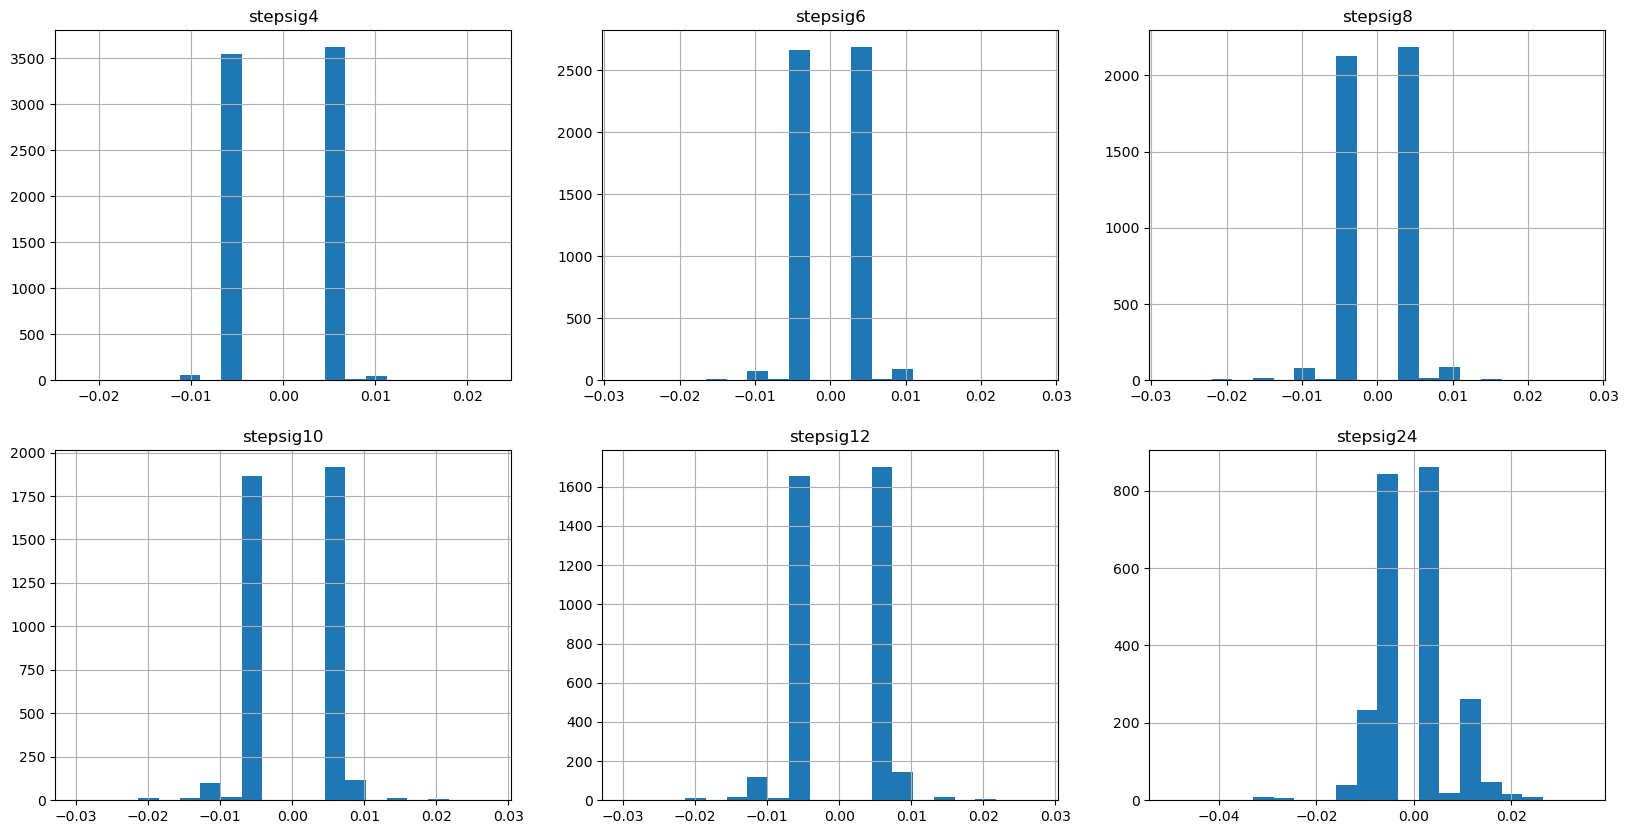

In [30]:
#统计非零的值的分布，画在一张图上
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
T2306_df['stepsig4'].loc[T2306_df['stepsig4'] != 0].hist(bins=20, ax=ax[0, 0])
ax[0, 0].set_title('stepsig4')
T2306_df['stepsig6'].loc[T2306_df['stepsig6'] != 0].hist(bins=20, ax=ax[0, 1])
ax[0, 1].set_title('stepsig6')
T2306_df['stepsig8'].loc[T2306_df['stepsig8'] != 0].hist(bins=20, ax=ax[0, 2])
ax[0, 2].set_title('stepsig8')
T2306_df['stepsig10'].loc[T2306_df['stepsig10'] != 0].hist(bins=20, ax=ax[1, 0])
ax[1, 0].set_title('stepsig10')
T2306_df['stepsig12'].loc[T2306_df['stepsig12'] != 0].hist(bins=20, ax=ax[1, 1])
ax[1, 1].set_title('stepsig12')
T2306_df['stepsig24'].loc[T2306_df['stepsig24'] != 0].hist(bins=20, ax=ax[1, 2])
ax[1, 2].set_title('stepsig24')
plt.show()

In [79]:
def cal_result(T, B, sig_len, after_n, sig_func = None):

    T_alldays = None
    n = 0

    for oneday in T['datatime'].apply(lambda x: x.date()).unique():
        t_oneday = T.loc[oneday.strftime('%Y-%m-%d')]
        t_oneday['order_sig'] = talib.RSI(T['midprice'], timeperiod = sig_len)
        if n == 0:
            T_alldays = t_oneday
            n = 1
        else:
            T_alldays = T_alldays.append(t_oneday)

    before_filter_number = len(T_alldays)   
    T_alldays = T_alldays.loc[T_alldays['order_sig'] != 0]
    T_alldays = filter_index(T_alldays, after_n)
    after_filter_number = len(T_alldays)
    

    B_buy_points = B.iloc[B.index.get_indexer(T_alldays[T_alldays['order_sig'] > 70].index.to_list(), method='nearest')]
    B_buy_points_after = B.iloc[B.index.get_indexer(T_alldays[T_alldays['order_sig'] > 70].index + pd.Timedelta(seconds=after_n), method='nearest')]

    B_sell_points = B.iloc[B.index.get_indexer(T_alldays[T_alldays['order_sig'] < 30].index.to_list(), method='nearest')]
    B_sell_points_after = B.iloc[B.index.get_indexer(T_alldays[T_alldays['order_sig'] < 30].index + pd.Timedelta(seconds=after_n), method='nearest')]

    Buy_point_number = len(B_buy_points) + len(B_sell_points)

    buy_price_delta = B_buy_points_after['midprice'].reset_index() - B_buy_points['midprice'].reset_index()
    buy_price_delta = buy_price_delta['midprice']
    sell_price_delta = B_sell_points['midprice'].reset_index() - B_sell_points_after['midprice'].reset_index()
    sell_price_delta = sell_price_delta['midprice']
    price_delta = buy_price_delta.append(sell_price_delta)
    q_low = price_delta.quantile(0.01)
    q_high = price_delta.quantile(0.99)
    df_filtered = price_delta[(price_delta >= q_low) & (price_delta <= q_high)]
    df_mean = df_filtered.mean()
    df_sum = df_filtered.sum()
    win_rate = df_filtered[df_filtered > 0].count() / df_filtered.count()
    loss_rate = df_filtered[df_filtered < 0].count() / df_filtered.count()
    return df_mean, win_rate, loss_rate, df_sum, before_filter_number, after_filter_number, Buy_point_number

In [56]:
result = cal_result(T2306_df, B220220_df, 8, 10, stepsig)
print(result)

(0.0007485447930876875, 0.5879945429740792, 0.19940882219190542, 3.2920999999996496, 176344, 4656, 4560)


In [76]:
def filter_index(df, time_diff):
    selected_index = []
    prev_index = None

    for index, row in df.iterrows():
        if prev_index is None:
            selected_index.append(index)
            prev_index = index
        else:
            time_diff = (index - prev_index).total_seconds()
            if time_diff >= 10:
                selected_index.append(index)
                prev_index = index
            else:
                continue
    return df.loc[selected_index]

In [92]:
def cal_equal_result(T, B, sig_len, after_n, sig_func = None):

    T_alldays = None
    n = 0

    for oneday in T['datatime'].apply(lambda x: x.date()).unique():
        t_oneday = T.loc[oneday.strftime('%Y-%m-%d')]
        #t_oneday['order_sig'] = t_oneday['midprice'].rolling(sig_len).apply(sig_func)
        t_oneday['order_sig'] = talib.RSI(T['midprice'], timeperiod = sig_len)

        if n == 0:
            T_alldays = t_oneday
            n = 1
        else:
            T_alldays = T_alldays.append(t_oneday)

    before_filter_number = len(T_alldays)   
    #T_alldays = T_alldays.loc[T_alldays['order_sig'] != 0]
    T_alldays = filter_index(T_alldays, after_n)
    after_filter_number = len(T_alldays)
    

    B_buy_points = B.iloc[B.index.get_indexer(T_alldays[(T_alldays['order_sig'] >=30) & (T_alldays['order_sig'] <= 70)].index.to_list(), method='nearest')]
    B_buy_points_after = B.iloc[B.index.get_indexer(T_alldays[(T_alldays['order_sig'] >= 30) & (T_alldays['order_sig'] <= 70)].index + pd.Timedelta(seconds=after_n), method='nearest')]

    # B_sell_points = B.iloc[B.index.get_indexer(T_alldays[T_alldays['order_sig'] < 0].index.to_list(), method='nearest')]
    # B_sell_points_after = B.iloc[B.index.get_indexer(T_alldays[T_alldays['order_sig'] < 0].index + pd.Timedelta(seconds=after_n), method='nearest')]

    Buy_point_number = len(B_buy_points)

    buy_price_delta = B_buy_points_after['midprice'].reset_index() - B_buy_points['midprice'].reset_index()
    buy_price_delta = buy_price_delta['midprice']
    # sell_price_delta = B_sell_points['midprice'].reset_index() - B_sell_points_after['midprice'].reset_index()
    # sell_price_delta = sell_price_delta['midprice']
    price_delta = buy_price_delta
    q_low = price_delta.quantile(0.01)
    q_high = price_delta.quantile(0.99)
    df_filtered = price_delta[(price_delta >= q_low) & (price_delta <= q_high)]
    df_mean = df_filtered.mean()
    df_sum = df_filtered.sum()
    win_rate = df_filtered[df_filtered > 0].count() / df_filtered.count()
    loss_rate = df_filtered[df_filtered < 0].count() / df_filtered.count()
    return df_mean, win_rate, loss_rate, df_sum, before_filter_number, after_filter_number, Buy_point_number

In [68]:
result = cal_equal_result(T2306_df, B220220_df, 8, 10, stepsig)
print(result)

(4.232416012914196e-06, 0.38099896733518124, 0.38102312323737403, 0.7008499999944746, 176344, 176344, 171688)


In [81]:
def cal_self_result(T, B, sig_len, after_n, sig_func=None):

    T_alldays = None
    n = 0

    for oneday in T['datatime'].apply(lambda x: x.date()).unique():
        t_oneday = T.loc[oneday.strftime('%Y-%m-%d')]
        #t_oneday['order_sig'] = t_oneday['midprice'].rolling(sig_len).apply(sig_func)
        t_oneday['order_sig'] = talib.RSI(T['midprice'], timeperiod = sig_len)
        t_oneday['order_sig'] = t_oneday['midprice']
        if n == 0:
            T_alldays = t_oneday
            n = 1
        else:
            T_alldays = T_alldays.append(t_oneday)

    before_filter_number = len(T_alldays)   
    T_alldays = T_alldays.loc[T_alldays['order_sig'] != 0]
    T_alldays = filter_index(T_alldays, after_n)
    after_filter_number = len(T_alldays)
    

    B_buy_points = T.iloc[T.index.get_indexer(T_alldays[T_alldays['order_sig'] > 70].index.to_list(), method='nearest')]
    B_buy_points_after = T.iloc[T.index.get_indexer(T_alldays[T_alldays['order_sig'] > 70].index + pd.Timedelta(seconds=after_n), method='nearest')]

    B_sell_points = T.iloc[T.index.get_indexer(T_alldays[T_alldays['order_sig'] < 30].index.to_list(), method='nearest')]
    B_sell_points_after = T.iloc[T.index.get_indexer(T_alldays[T_alldays['order_sig'] < 30].index + pd.Timedelta(seconds=after_n), method='nearest')]

    Buy_point_number = len(B_buy_points) + len(B_sell_points)

    buy_price_delta = B_buy_points_after['midprice'].reset_index() - B_buy_points['midprice'].reset_index()
    buy_price_delta = buy_price_delta['midprice']
    sell_price_delta = B_sell_points['midprice'].reset_index() - B_sell_points_after['midprice'].reset_index()
    sell_price_delta = sell_price_delta['midprice']
    price_delta = buy_price_delta.append(sell_price_delta)
    q_low = price_delta.quantile(0.01)
    q_high = price_delta.quantile(0.99)
    df_filtered = price_delta[(price_delta >= q_low) & (price_delta <= q_high)]
    df_mean = df_filtered.mean()
    df_sum = df_filtered.sum()
    win_rate = df_filtered[df_filtered > 0].count() / df_filtered.count()
    loss_rate = df_filtered[df_filtered < 0].count() / df_filtered.count()
    return df_mean, win_rate, loss_rate, df_sum, before_filter_number, after_filter_number, Buy_point_number

In [ ]:
def rsisig(x):
    sig_len = len(x)
    before = x[-sig_len:-sig_len//2]
    after = x[-sig_len//2:]
    b = min(after) - max(before)
    s = min(before) - max(after)
    if b >= 0.0049:
        return x[-1] - x[0]
    elif s >= 0.0049:
        return x[-1] - x[0]
    else:  
        return 0

In [94]:
result = cal_result(T2306_df, B220220_df, 40, 30)
result_equal = cal_equal_result(T2306_df, B220220_df, 40, 30)
result_self = cal_self_result(T2306_df, B220220_df, 40, 30)
print(result)
print(result_equal)
print(result_self)

(0.0008463636363637761, 0.6072727272727273, 0.33090909090909093, 0.23275000000003843, 176344, 16775, 281)
(5.689806678400931e-05, 0.44551845342706503, 0.37697715289982425, 0.06475000000020259, 176344, 16775, 1162)
(3.0219279596676642e-05, 0.25329526817712444, 0.251230030978558, 0.49750000000008754, 176344, 16775, 16763)


In [91]:
(T2306_df['rsi40'] >=30) & (T2306_df['rsi40'] <= 70)


datatime
2023-02-28 07:03:39.000    False
2023-02-28 09:29:00.000    False
2023-02-28 09:30:00.000    False
2023-02-28 09:30:00.500    False
2023-02-28 09:30:01.000    False
                           ...  
2023-03-31 15:14:58.500    False
2023-03-31 15:14:59.000    False
2023-03-31 15:14:59.500    False
2023-03-31 15:15:00.000    False
2023-03-31 15:25:37.000    False
Name: rsi40, Length: 176344, dtype: bool

In [43]:
T2306_df

,datatime,LAST,BID1,ASK1,VOLUME,midprice
datatime,,,,,,
2023-02-28 07:03:39.000,2023-02-28 07:03:39.000,99.735,NaN,NaN,NaN,NaN
2023-02-28 09:29:00.000,2023-02-28 09:29:00.000,99.695,99.690,99.695,72.0,99.6925
2023-02-28 09:30:00.000,2023-02-28 09:30:00.000,99.695,99.690,99.695,124.0,99.6925
2023-02-28 09:30:00.500,2023-02-28 09:30:00.500,99.690,99.685,99.690,149.0,99.6875
2023-02-28 09:30:01.000,2023-02-28 09:30:01.000,99.680,99.680,99.690,175.0,99.6850
...,...,...,...,...,...,...
2023-03-31 15:14:58.500,2023-03-31 15:14:58.500,100.455,100.455,100.460,66001.0,100.4575
2023-03-31 15:14:59.000,2023-03-31 15:14:59.000,100.460,100.455,100.460,66002.0,100.4575
2023-03-31 15:14:59.500,2023-03-31 15:14:59.500,100.455,100.455,100.460,66012.0,100.4575
